In [88]:
# import necessary packages
import pandas as pd
import numpy as np
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import pytextrank
import nltk


Loading the data

In [89]:
df =pd.read_csv("../data/sentiments.csv", index_col=0)

In [90]:
# lets check if the dataset is loaded
print(f"The shape of dataset is {df.shape}")
print(f"This dataset has {df.shape[0]} rows (examples of data).")
print(f"This dataset has {df.shape[1]} columns (features of data).")


The shape of dataset is (1407328, 5)
This dataset has 1407328 rows (examples of data).
This dataset has 5 columns (features of data).


# Data profiling

1. Summary statistics and Missing value report

In [91]:
# first five rows of tabular data
df.head()

,headline,url,publisher,date,stock
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [92]:
# log the last examples of this dataset
df.tail()

,headline,url,publisher,date,stock
1413844,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29 00:00:00,ZX
1413845,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22 00:00:00,ZX
1413846,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00,ZX
1413847,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00,ZX
1413848,China Zenix Auto International Opens For Tradi...,https://www.benzinga.com/news/ipos/11/05/10789...,Allie Wickman,2011-05-12 00:00:00,ZX


In [93]:
# log random 5 exaples of the dataset
df.sample(5)

,headline,url,publisher,date,stock
211965,61 Biggest Movers From Friday,https://www.benzinga.com/news/19/02/13197015/6...,Lisa Levin,2019-02-19 00:00:00,CARV
1109160,UPDATE: Nomura Lowers PT on Riverbed Technolog...,https://www.benzinga.com/analyst-ratings/analy...,Dwight Einhorn,2013-02-08 00:00:00,RVBD
167122,"8 Notable Stocks Trading Ex-Dividend Friday, J...",https://www.benzinga.com/news/16/07/8273244/8-...,Lisa Levin,2016-07-28 00:00:00,BKEP
347088,"Dillard Beats on EPS, Sales Fall - Analyst Blog",https://www.benzinga.com/10/11/609524/dillard-...,Zacks,2010-11-15 00:00:00,DDS
758376,68 Biggest Movers From Friday,https://www.benzinga.com/news/19/06/13967593/6...,Lisa Levin,2019-06-24 04:25:34-04:00,LGCY


In [94]:
# check more information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1407328 entries, 0 to 1413848
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   headline   1407328 non-null  object
 1   url        1407328 non-null  object
 2   publisher  1407328 non-null  object
 3   date       1407328 non-null  object
 4   stock      1407328 non-null  object
dtypes: object(5)
memory usage: 64.4+ MB


In [95]:
# check if a null value exists
print("Check for missing values:")
df.isna().sum()

Check for missing values:


headline     0
url          0
publisher    0
date         0
stock        0
dtype: int64

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1407328 entries, 0 to 1413848
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   headline   1407328 non-null  object
 1   url        1407328 non-null  object
 2   publisher  1407328 non-null  object
 3   date       1407328 non-null  object
 4   stock      1407328 non-null  object
dtypes: object(5)
memory usage: 64.4+ MB


In [97]:
# 1. Calculate the percentage of missing values for every column
null_percentages = df.isnull().sum() / len(df) * 100

# 2. Filter the resulting Series for percentages greater than 5
columns_with_high_nulls = null_percentages[null_percentages > 5]

# 3. Print the results
print("Columns with >5% Null Values:")
print(columns_with_high_nulls)

Columns with >5% Null Values:
Series([], dtype: float64)


In [98]:
# Check if null rows exist
# 1. Define the critical columns
key_cols = ['headline', 'url', 'publisher', 'date', 'stock']

# 2. Create a boolean mask:
missing_rows_mask = df[key_cols].isnull().any(axis=1)

# 3. Use the mask to display the subset of rows with missing data
missing_value_rows = df[missing_rows_mask]

# 4. Display the resulting DataFrame
print(f"Total rows with missing values in the key columns: {len(missing_value_rows)}")
print("Rows with Missing Data (only showing the key columns for focus):")
print(missing_value_rows[key_cols])

Total rows with missing values in the key columns: 0
Rows with Missing Data (only showing the key columns for focus):
Empty DataFrame
Columns: [headline, url, publisher, date, stock]
Index: []


In [99]:
#check if duplication of rows exist
dup_count = df.duplicated().sum()
print("Duplicate rows:", dup_count)

Duplicate rows: 1


In [100]:
# Cardinality (uniqueness) for categoricals
cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()
cardinality = {c: df[c].nunique() for c in cat_cols}
print("Cardinality (categoricals):", cardinality)

Cardinality (categoricals): {'headline': 845770, 'url': 883429, 'publisher': 1034, 'date': 39957, 'stock': 6204}


In [101]:
# --- 2. Date Structure and Time Series Preparation (Keep as Column) ---

if 'date' in df.columns:

    # Safely convert to datetime, infer format, and set UTC
    df['date'] = pd.to_datetime(df['date'], utc=True, errors='coerce')

    # Check for any conversion failures
    if df['date'].isna().any():
        print("Warning: Some dates could not be parsed and are set as NaT.")
    
    print("\n--- 2. Date Column Structure (After Conversion) ---")
    print(df['date'].head())
    print(f"Data type is now: {df['date'].dtype}")

else:
    print("\nWarning: Date column not found. Skipping date conversion.")



--- 2. Date Column Structure (After Conversion) ---
0   2020-06-05 14:30:54+00:00
1   2020-06-03 14:45:20+00:00
2   2020-05-26 08:30:07+00:00
3   2020-05-22 16:45:06+00:00
4   2020-05-22 15:38:59+00:00
Name: date, dtype: datetime64[ns, UTC]
Data type is now: datetime64[ns, UTC]


# 2. Exploratory Data Analysis

## Descriptive statistics

In [102]:
# Create a column for headline length (number of characters)
df["headline_length"] = df["headline"].str.len()

# Basic descriptive statistics
print("Headline Length Statistics:")
print(df["headline_length"].describe())


Headline Length Statistics:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


Count number of articles per publisher

In [103]:
# Count articles by publisher
publisher_counts = df["publisher"].value_counts()

print("Articles per Publisher:")
print(publisher_counts)


Articles per Publisher:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64


In [ ]:
# Count stock
stock_counts = df["stock"].value_counts()

print("numbers of stock:")
print(stock_counts)


stock per day:
stock
MRK     3333
MS      3238
NVDA    3146
MU      3142
QQQ     3106
        ... 
DWM        1
DWAT       1
DVP        1
DXJS       1
DXJR       1
Name: count, Length: 6204, dtype: int64


In [104]:
df["date"] = pd.to_datetime(df["date"], errors="coerce")


In [105]:
print(df.columns)


Index(['headline', 'url', 'publisher', 'date', 'stock', 'headline_length'], dtype='object')


In [106]:
# Determine where the date is
if 'date' in df.columns:
    date_series = df['date']
elif df.index.name == 'date':
    date_series = df.index
else:
    raise KeyError("No 'date' column or index found in the DataFrame.")

# Ensure datetime type
date_series = pd.to_datetime(date_series, errors='coerce')

# Count articles per day
articles_per_day = date_series.dt.date.value_counts().sort_index()

print("Articles per Day:")
print(articles_per_day)


Articles per Day:
date
2011-04-28      3
2011-04-29      2
2011-04-30      1
2011-05-01      1
2011-05-02      9
             ... 
2020-06-07     25
2020-06-08    765
2020-06-09    803
2020-06-10    807
2020-06-11    544
Name: count, Length: 2502, dtype: int64


<Axes: title={'center': 'Article Frequency Over Time'}, xlabel='date'>

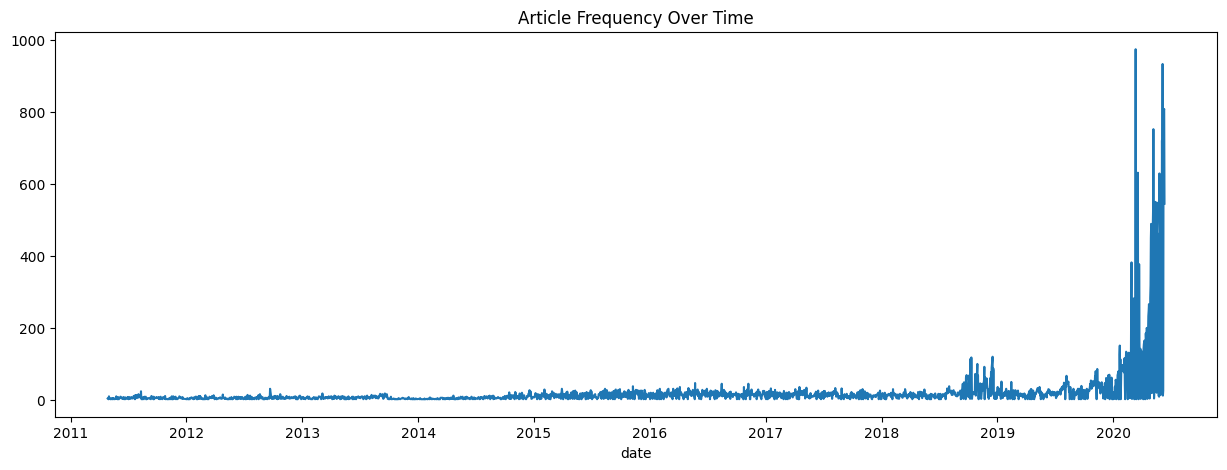

In [107]:
articles_per_day.plot(figsize=(15,5), title="Article Frequency Over Time")


C:\Users\Birhanu Matebe\AppData\Local\Temp\ipykernel_7928\1863849983.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  articles_per_month = df["date"].dt.to_period("M").value_counts().sort_index()


Articles per Month:
date
2011-04       6
2011-05      78
2011-06      95
2011-07     137
2011-08     149
           ... 
2020-02    2355
2020-03    4681
2020-04    4616
2020-05    9333
2020-06    5990
Freq: M, Name: count, Length: 111, dtype: int64


<Axes: title={'center': 'Articles per Month'}, xlabel='date'>

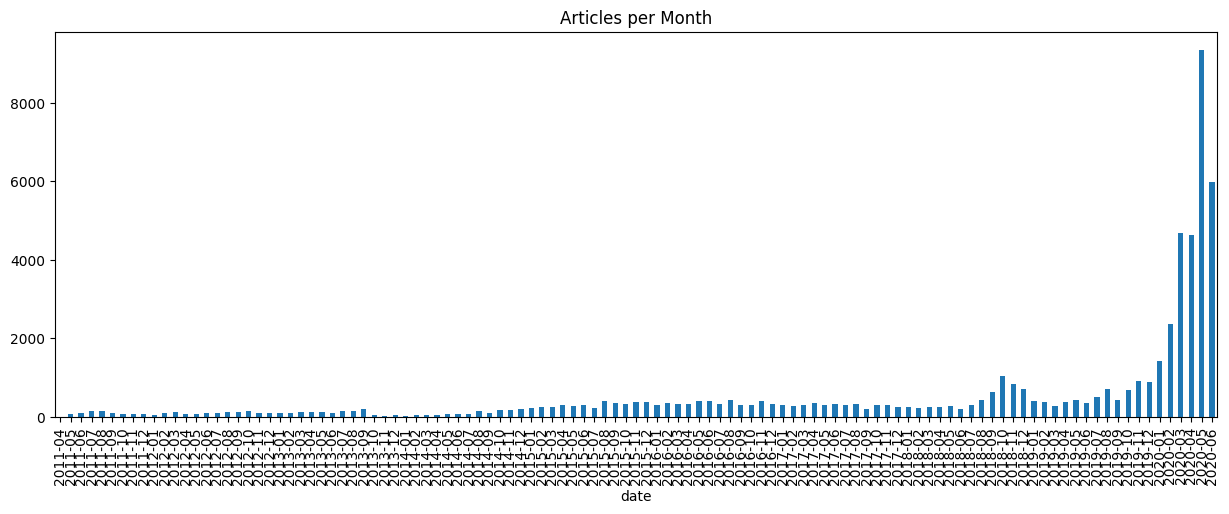

In [108]:
articles_per_month = df["date"].dt.to_period("M").value_counts().sort_index()

print("Articles per Month:")
print(articles_per_month)

articles_per_month.plot(kind="bar", figsize=(15,5), title="Articles per Month")


In [109]:
df["day_of_week"] = df["date"].dt.day_name()

print(df["day_of_week"].value_counts())


day_of_week
Thursday     12712
Wednesday    11873
Tuesday      11037
Monday       10297
Friday        9407
Sunday         388
Saturday       273
Name: count, dtype: int64


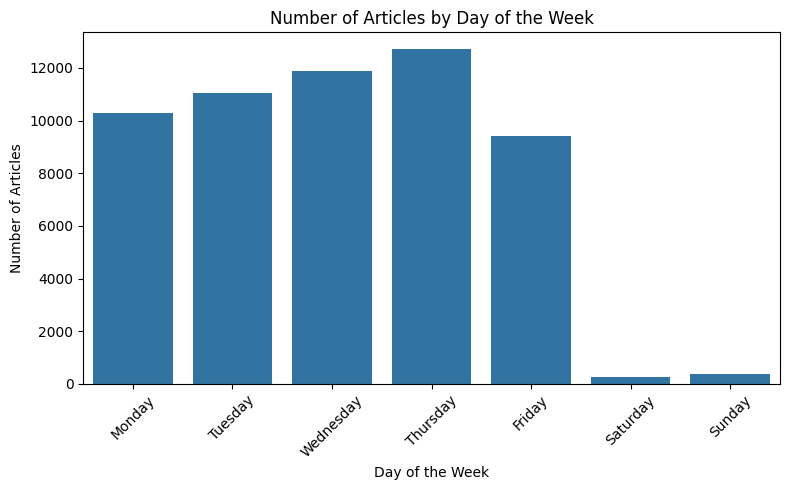

In [111]:
# Count articles per day of the week
day_counts = df["day_of_week"].value_counts().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)  # Ensure correct order

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=day_counts.index, y=day_counts.values)
plt.title("Number of Articles by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

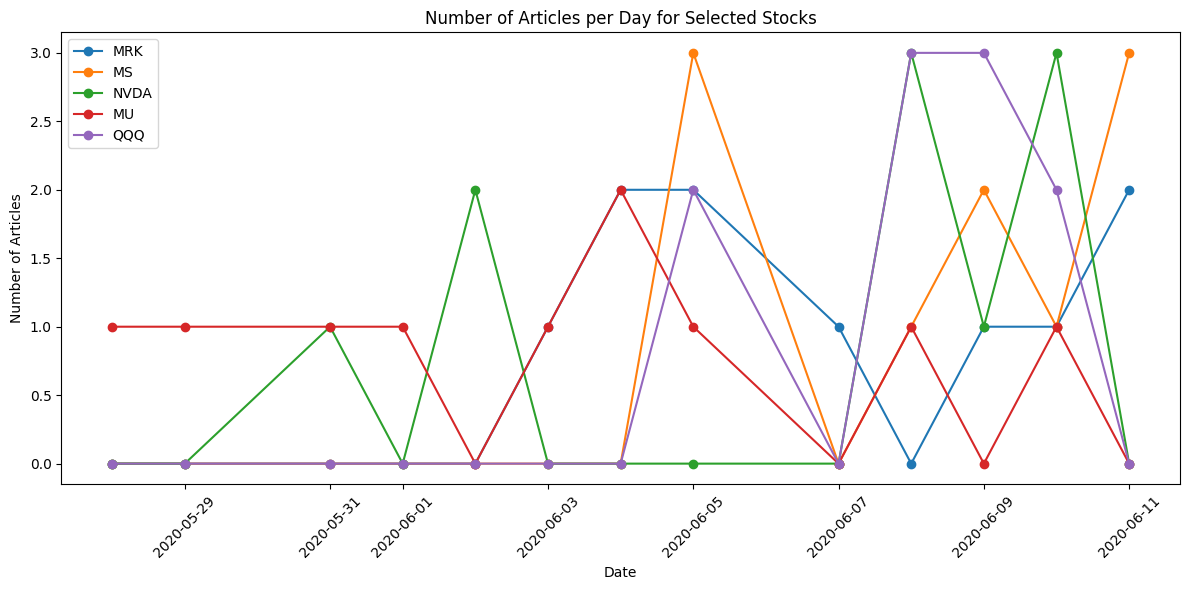

In [115]:

# List of stocks to focus on
selected_stocks = ['MRK', 'MS', 'NVDA', 'MU', 'QQQ']

# Filter the DataFrame
df_filtered = df[df['stock'].isin(selected_stocks)]

# Group by date and stock, count articles
articles_per_day_stock = df_filtered.groupby([df_filtered['date'].dt.date, 'stock']).size().unstack(fill_value=0)

# Plot
plt.figure(figsize=(12,6))
for stock in selected_stocks:
    if stock in articles_per_day_stock.columns:
        plt.plot(articles_per_day_stock.index, articles_per_day_stock[stock], marker='o', label=stock)

plt.title("Number of Articles per Day for Selected Stocks")
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

## Text Analysis